<a href="https://colab.research.google.com/github/remz05/bertopic/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('abcnews_sample.csv')
data.head()


,publish_date,headline_text
0,20050627,lawyer claims aust govt has abandoned corby
1,20051206,singapore tells spouses of patients hiv status
2,20141119,iron ore price slumps to new five year low
3,20060203,youth crime prevention schemes share in funds
4,20190521,harry triguboff speaks to the business


In [1]:
print("hear me?")

hear me?


In [ ]:
#creating new column
data['text_len'] = data['headline_text'].apply(lambda x: len(x.split()))

In [ ]:
data['text_len']

0        7
1        7
2        9
3        7
4        6
        ..
19995    8
19996    8
19997    6
19998    5
19999    4
Name: text_len, Length: 20000, dtype: int64

In [ ]:
# prompt: find the max in third column

data['text_len'].max()


13

<Axes: >

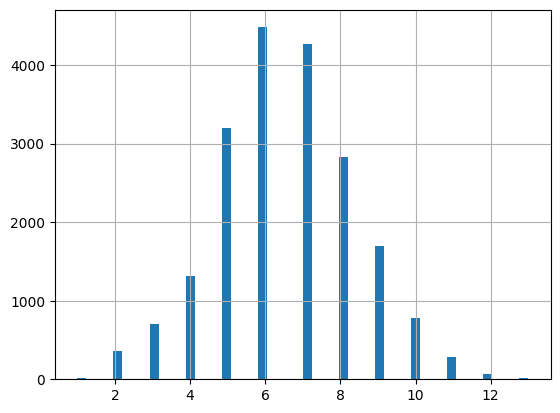

In [ ]:
# prompt: create a plot for the third column to see the distribution discretely

data['text_len'].hist(bins=50)


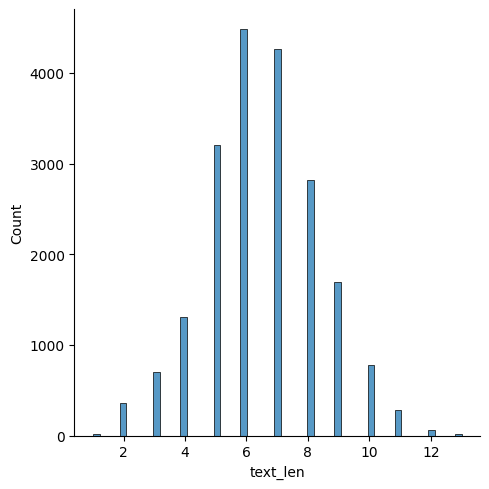

In [ ]:
#sampling 3 random rows from the dataset
for idx in data.sample(3).index:
  headline = data.iloc[idx]
  print("Headline #{}:".format(idx))
  print("Publication date: {}".format(headline['publish_date']))
  print("Text: {}\n".format(headline.headline_text))

Headline #6511:
Publication date: 20130221
Text: fairfax profit rises on one off gains

Headline #13376:
Publication date: 20090703
Text: woman unlawfully used courts computers

Headline #1832:
Publication date: 20150615
Text: canberrans to pay less for household electricity bills



In [ ]:
import warnings
warnings.filterwarnings("ignore")
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039281 sha256=75d2056c7bfb90cfc01b42a2582c5b84ac72214a290c76e092a4f6eb48efa686
  Stored in dir